#MidTerm Assignment - Analysing German Credit Dataset by Atul Shah (ID: 014530243)


#Business Case and Value

###Banks and other financial institution need to verify the credibility of individuals before giving them loan. There is always a risk of an individual defaulting the loan and not be able to repay the amount loaned. This depends on several factors which can be used to develop patterns. These factors(features) can be fed to the machine learning algorithms and patterns can be learned from past data which can help reduce risk of giving out loans.

#Data Narrative

###This dataset looks at data of various individuals and characterize the risk of giving loan to be either "Good Loan" or "Bad Loan" by considering various dimensions from the dataset.

###We are going to visualize the data, consider numerical and categorical attributes, scale the numerical features, encode the categorical features and run various classification algorithms to evaluate their accuracy.

###Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


###Reading the dataset

In [0]:

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
file=requests.get(url).content


features = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
german_credit=pd.read_csv(io.StringIO(file.decode('utf-8')),names = features, delimiter=' ')


###Previewing the dataset

In [3]:
print(german_credit.shape)
german_credit.head(10)

(1000, 21)


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


###Data Types of features

In [4]:

german_credit.classification.replace([1,2], [1,0], inplace=True)
german_credit.classification.value_counts()
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

#Preprocessing

###Finding Missing Values

In [5]:
print(german_credit.isnull().sum().sum())

0


So there are no null values in the dataset.

###Separating out numerical features

In [0]:

numerical_features = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

scaled_num_features = pd.DataFrame(StandardScaler().fit_transform(german_credit[numerical_features].drop(['classification'], axis=1)))


In [7]:
scaled_num_features.head()

,0,1,2,3,4,5,6
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.634247,1.750384,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.566664,0.256953,0.024147,1.046987,1.535122,1.027079,2.334869


#Data Enrichment

###Separating out categorical features and applying one hot encoding

In [8]:
cat_features = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']
label_dict = defaultdict(LabelEncoder)
lb_cat_features = german_credit[cat_features].apply(lambda x: label_dict[x.name].fit_transform(x))
encoded_features = pd.get_dummies(german_credit[cat_features])

print(encoded_features.shape)
print(scaled_num_features.shape)

(1000, 54)
(1000, 7)


###Concatenating categorical and numerical features.

In [9]:
all_features = pd.concat([scaled_num_features,german_credit['classification'],encoded_features], axis = 1)
print(all_features.shape)

raw_data=pd.concat([german_credit[numerical_features],encoded_features], axis = 1)

print(raw_data.shape)




(1000, 62)
(1000, 62)


In [10]:
all_features.head()

,0,1,2,3,4,5,6,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employmentsince_A71,employmentsince_A72,employmentsince_A73,employmentsince_A74,employmentsince_A75,statussex_A91,statussex_A92,statussex_A93,statussex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,1.634247,1.750384,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,0.566664,0.256953,0.024147,1.046987,1.535122,1.027079,2.334869,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0


#Visualizations

###Correlation plot to find correlation between features.

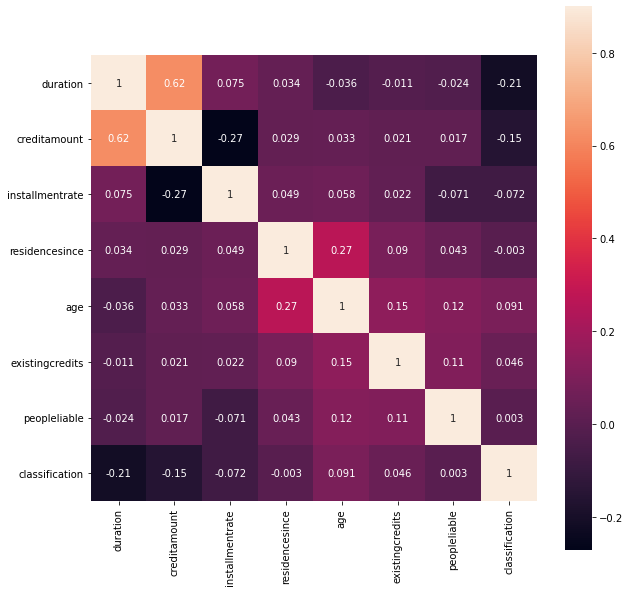

In [11]:
corrplot = german_credit.corr(method='pearson')
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(10,10)
sns.heatmap(corrplot,vmax = 0.9, square = True, annot = True)
plt.show()


###Box Plot for continuous numerical features

Text(0.5, 1.0, 'age')

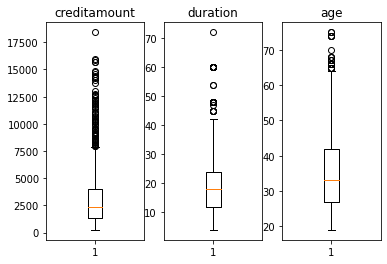

In [12]:
figure, box = plt.subplots(nrows=1, ncols=3)
box[0].boxplot(german_credit['creditamount'])
box[0].set_title('creditamount')
box[1].boxplot(german_credit['duration'])
box[1].set_title('duration')
box[2].boxplot(german_credit['age'])
box[2].set_title('age')


###Histogram for numerical features

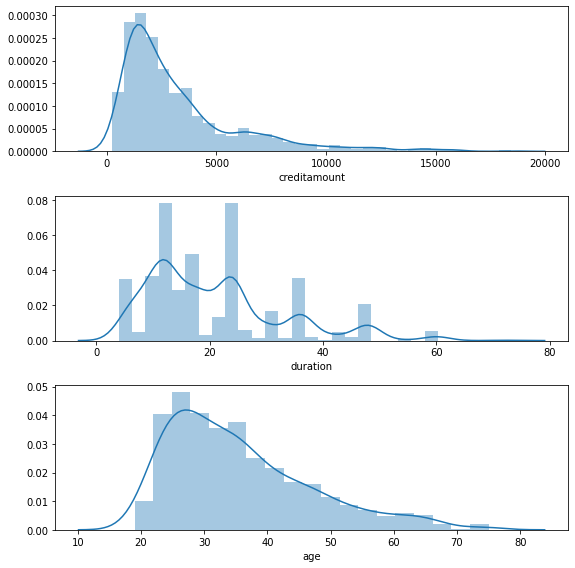

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(german_credit["creditamount"], ax=ax1)
sns.distplot(german_credit["duration"], ax=ax2)
sns.distplot(german_credit["age"], ax=ax3)
plt.tight_layout()

###Setting up predictors and target features

In [14]:
X_features = all_features.drop('classification', axis=1)

X_raw = raw_data.drop('classification', axis=1)
df=all_features
Y_target = all_features['classification']
Y_raw = raw_data['classification']

X_features.head()

,0,1,2,3,4,5,6,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employmentsince_A71,employmentsince_A72,employmentsince_A73,employmentsince_A74,employmentsince_A75,statussex_A91,statussex_A92,statussex_A93,statussex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,1.634247,1.750384,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,0.566664,0.256953,0.024147,1.046987,1.535122,1.027079,2.334869,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0


#Data Enrichment

Splitting up Train and Test data, along with balancing of classes.

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_features,Y_target,test_size=0.3, random_state=1)

sm = SMOTE(ratio='auto')

## Balancing the classes
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
X_train_bal.shape

(972, 61)

###Function to generate Accuracy metric report.

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


def get_accuracy_metrics(X_train, y_train,y_test,y_pred):


 target_names=['Bad Loan', 'Good Loan']

 print("\n\nAccuracy Score:\n")

 print(accuracy_score(y_test, y_pred))

 print("-----------------------\n")

 

 print("\n\nClassification Report:\n")
 print("-----------------------\n")
 print(classification_report(y_test, y_pred, target_names=target_names))
 print("\n\nConfusion Matrix:\n")

 print("-----------------------\n")
 print(confusion_matrix(y_test, y_pred))


 

##ROC Curve

   
 fpr = dict()
 tpr = dict()
 roc_auc = dict()
 fpr, tpr, _ = roc_curve(y_test, y_pred)
 roc_auc = auc(fpr, tpr)
 
 plt.figure()
 lw = 2
 plt.plot(fpr, tpr, color='red',
          label='ROC curve (area = %0.2f)' % roc_auc)
 plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.0])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('ROC Curve')
 plt.legend(loc="upper left")
 plt.show()

 return

#Algorithms and their interpretation

###GMM Clustering

In [0]:
from sklearn.mixture import GaussianMixture
x_clustered = X_raw[['age','creditamount','duration']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_clustered)
gmm=GaussianMixture(n_components=3, covariance_type="spherical").fit(x_scaled)
y_pred = gmm.predict(x_scaled)


GMM - Clustering


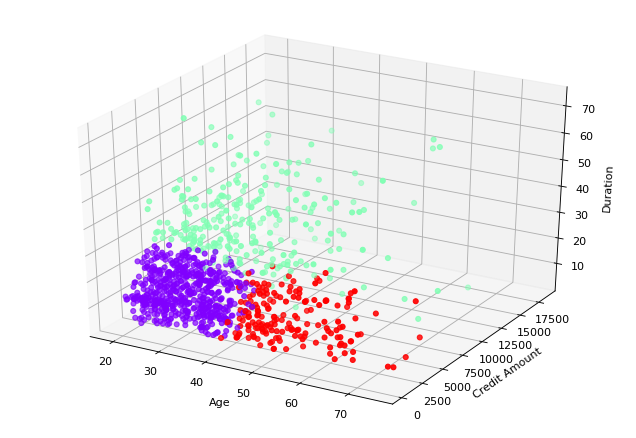

In [19]:
fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(x_clustered['age'],x_clustered['creditamount'],x_clustered['duration'],c=y_pred, cmap='rainbow')


x_lab = ax.set_ylabel('Credit Amount', linespacing=3.1)
y_lab = ax.set_zlabel('Duration', linespacing=3.2)
z_lab = ax.set_xlabel('Age', linespacing=3.5)
print("GMM - Clustering")

# K - Means

In [20]:
from sklearn.cluster import KMeans
x_clustered = X_raw[['age','creditamount','duration']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_clustered)
X_scaled

array([[ 2.76645648, -0.74513141, -1.23647786],
       [-1.19140394,  0.94981679,  2.24819436],
       [ 1.18331231, -0.41656241, -0.73866754],
       ...,
       [ 0.21583532, -0.87450324, -0.73866754],
       [-1.10345149, -0.50552769,  1.9992892 ],
       [-0.75164167,  0.46245715,  1.9992892 ]])

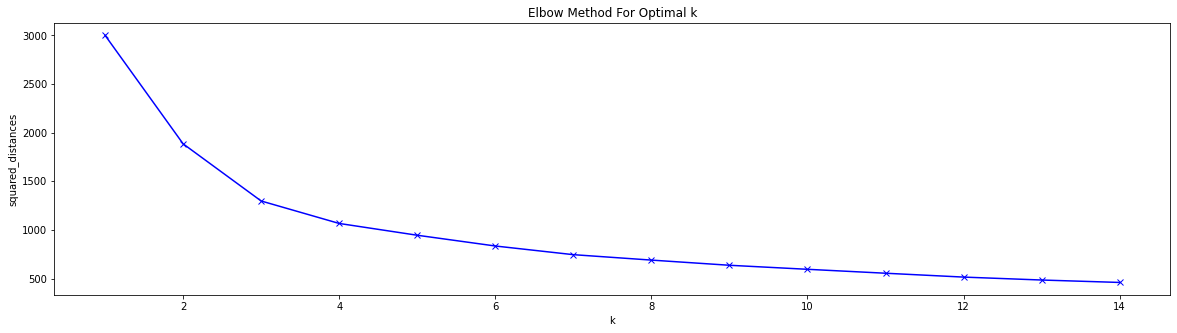

In [30]:
arr = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_scaled)
    arr.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, arr, 'bx-')
plt.xlabel('k')
plt.ylabel('squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:

kmeans_ = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans_.fit_predict(x_scaled)

K-Means


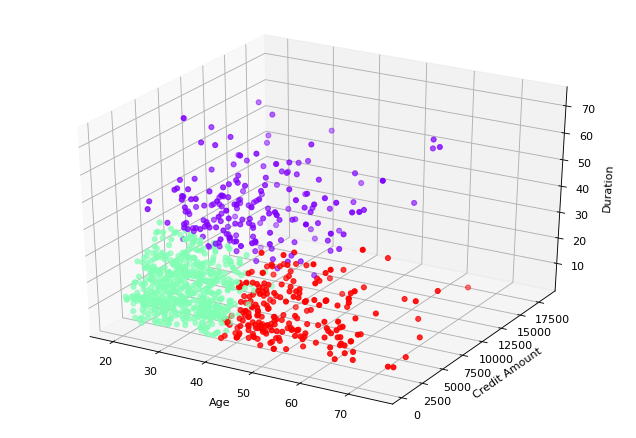

In [32]:
fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(x_clustered['age'],x_clustered['creditamount'],x_clustered['duration'],c=y_kmeans, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

###Logistic Regression



Accuracy Score:

0.72
-----------------------



Classification Report:

-----------------------

              precision    recall  f1-score   support

    Bad Loan       0.51      0.64      0.57        86
   Good Loan       0.84      0.75      0.79       214

    accuracy                           0.72       300
   macro avg       0.67      0.70      0.68       300
weighted avg       0.74      0.72      0.73       300



Confusion Matrix:

-----------------------

[[ 55  31]
 [ 53 161]]


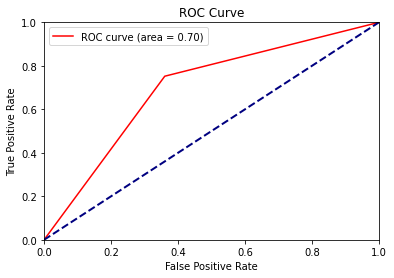

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train_bal, y_train_bal)


y_pred = model.predict(X_test)


get_accuracy_metrics(X_train_bal, y_train_bal ,y_test,y_pred)




# Linear Regression 

In [34]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error
res = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",res)
from sklearn.metrics import mean_absolute_error
res=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",res)
print ("\nModel Score:\n")
model.score(X_test,y_test)



Mean Squared Error: 0.1699805188179016
Mean Absolute Error: 0.3430354817708333

Model Score:



0.1687542548570341

# XGBOOST

Accuracy: 
78.0


Accuracy Score:

0.78
-----------------------



Classification Report:

-----------------------

              precision    recall  f1-score   support

    Bad Loan       0.65      0.50      0.57        86
   Good Loan       0.82      0.89      0.85       214

    accuracy                           0.78       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



Confusion Matrix:

-----------------------

[[ 43  43]
 [ 23 191]]


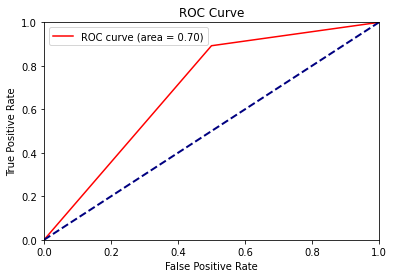

In [35]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size = 0.30,random_state=0)
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ")
print(round(accuracy_score(y_test,y_pred)*100,2))
get_accuracy_metrics(X_train,y_train,y_test,y_pred)


###Random Forest



Accuracy Score:

0.9266666666666666
-----------------------



Classification Report:

-----------------------

              precision    recall  f1-score   support

    Bad Loan       0.88      0.86      0.87        86
   Good Loan       0.94      0.95      0.95       214

    accuracy                           0.93       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.93      0.93      0.93       300



Confusion Matrix:

-----------------------

[[ 74  12]
 [ 10 204]]


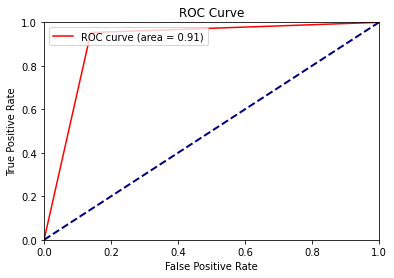

In [36]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier().fit(X_train_bal, y_train_bal)


y_pred = randomforest.predict(X_test)

get_accuracy_metrics(X_train_bal, y_train_bal,y_test,y_pred)


###SVM



Accuracy Score:

0.74
-----------------------



Classification Report:

-----------------------

              precision    recall  f1-score   support

    Bad Loan       0.53      0.78      0.63        86
   Good Loan       0.89      0.72      0.80       214

    accuracy                           0.74       300
   macro avg       0.71      0.75      0.72       300
weighted avg       0.79      0.74      0.75       300



Confusion Matrix:

-----------------------

[[ 67  19]
 [ 59 155]]


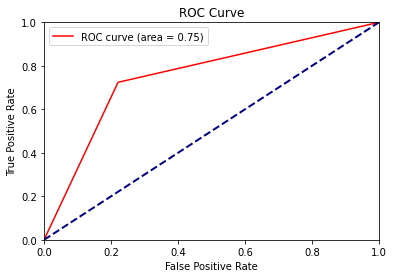

In [37]:
from sklearn import svm

model = svm.LinearSVC(C=2, class_weight="balanced",dual=False).fit(X_train_bal, y_train_bal)


y_pred = model.predict(X_test)
    

get_accuracy_metrics(X_train_bal, y_train_bal,y_test,y_pred)


###K Nearest Neighbor



Accuracy Score:

0.67
-----------------------



Classification Report:

-----------------------

              precision    recall  f1-score   support

    Bad Loan       0.46      0.90      0.61        86
   Good Loan       0.93      0.58      0.71       214

    accuracy                           0.67       300
   macro avg       0.70      0.74      0.66       300
weighted avg       0.80      0.67      0.68       300



Confusion Matrix:

-----------------------

[[ 77   9]
 [ 90 124]]


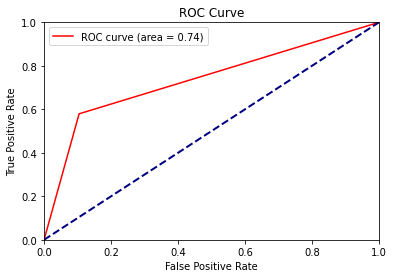

KNN Score: 0.7705761316872428


In [38]:
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=10).fit(X_train_bal, y_train_bal)

    
    y_pred = knn.predict(X_test)

    
    get_accuracy_metrics(X_train_bal, y_train_bal,y_test,y_pred)
    
print ("KNN Score:", knn.score(X_train_bal, y_train_bal))

# PCA - Principle Component Analysis

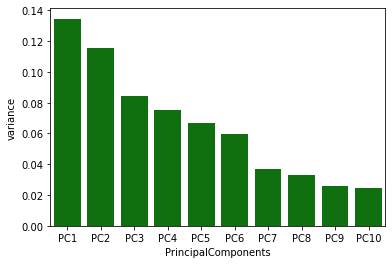

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit_transform(X_train, y_train)
var=pca.explained_variance_ratio_


df = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'PrincipalComponents':['PC1','PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10']})
sns.barplot(x='PrincipalComponents',y="variance", 
           data=df, color="g");

###Naive Bayes



Accuracy Score:

0.6866666666666666
-----------------------



Classification Report:

-----------------------

              precision    recall  f1-score   support

    Bad Loan       0.47      0.79      0.59        86
   Good Loan       0.88      0.64      0.75       214

    accuracy                           0.69       300
   macro avg       0.68      0.72      0.67       300
weighted avg       0.77      0.69      0.70       300



Confusion Matrix:

-----------------------

[[ 68  18]
 [ 76 138]]


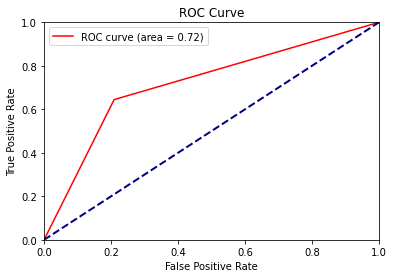

In [40]:
from sklearn.naive_bayes import GaussianNB


gauss_nb = GaussianNB().fit(X_train_bal, y_train_bal)

y_pred = gauss_nb.predict(X_test)


get_accuracy_metrics(X_train_bal, y_train_bal,y_test,y_pred)

###Latent variable and Latent Manifold Identification

####Using Factor Analyzer for identify hidden variables in terms of original features.

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [42]:
pip install factor_analyzer

In [43]:
import factor_analyzer

from factor_analyzer import FactorAnalyzer

fa=FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(X_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [44]:
loadings=fa.loadings_

print(loadings)

[[ 5.97079461e-01  2.60198267e-02  7.43469163e-02  3.38569425e-02
  -7.05622682e-02  1.34845887e-01]
 [ 4.37564395e-01  2.06946073e-02  5.97253281e-02 -1.25196544e-01
  -4.96045985e-02  1.33183371e-01]
 [-6.59708410e-02  1.54428976e-01  1.77797505e-02 -1.58672561e-01
   9.54794012e-03 -2.63958490e-02]
 [ 7.31278938e-02  1.81603155e-01  3.53248838e-01 -2.02224823e-02
   2.16756776e-02 -7.93379091e-02]
 [ 6.66136201e-02  4.69958819e-01  2.11612130e-01  3.18717617e-02
   3.07217965e-02 -2.29653675e-03]
 [-2.00796347e-02  4.27061651e-01 -2.99602870e-02  1.54878425e-03
   8.35496475e-02  2.08710838e-02]
 [-5.19458931e-02  2.57353217e-01  1.04651585e-01  1.22546321e-01
  -1.55199074e-02  9.52541369e-02]
 [-6.97648428e-02 -1.07294852e-01  1.99875143e-01  8.62033680e-02
  -1.71098540e-01  3.55659526e-02]
 [ 1.15073233e-01 -1.52435565e-01 -4.14718445e-02 -4.04052078e-02
  -1.07090248e-01  1.43470090e-01]
 [-7.50241566e-02 -1.86990883e-02  3.16422065e-03  3.73447063e-02
   3.93669601e-02  6.5688

In [0]:
ev,v=fa.get_eigenvalues()

In [0]:
Xvals=range(1,X_features.shape[1]+1)

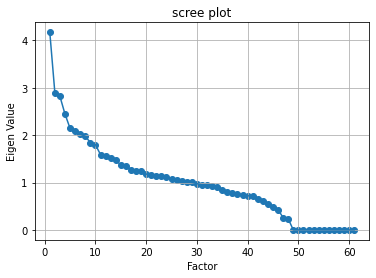

In [47]:
plt.scatter(Xvals,ev)
plt.plot(Xvals,ev)
plt.title('scree plot')
plt.xlabel('Factor')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

In [48]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.597079,0.026020,0.074347,0.033857,-0.070562,0.134846
1,0.437564,0.020695,0.059725,-0.125197,-0.049605,0.133183
2,-0.065971,0.154429,0.017780,-0.158673,0.009548,-0.026396
3,0.073128,0.181603,0.353249,-0.020222,0.021676,-0.079338
4,0.066614,0.469959,0.211612,0.031872,0.030722,-0.002297
...,...,...,...,...,...,...
56,0.521037,0.066112,0.063629,0.061529,-0.023878,0.120822
57,-0.740133,-0.137925,0.101063,0.031383,-0.037771,0.026469
58,0.740133,0.137925,-0.101063,-0.031383,0.037771,-0.026469
59,0.106268,-0.047271,0.131110,-0.918522,0.105630,0.076715


#Data Enrichment 
The above results identify hidden variables which can be obtained in relation to the original attributes. These latent variables can be used to further enrich the dataset and for modeling purposes.

#Interpretation of results

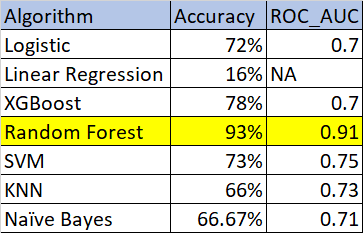

###Clearly Random forest does the best(93%) among all the classification algorithms.

1. A random forest is an ensemble of decision trees oprating as a committe. Each inidividual tree in the ensemble predicts the class and the class which gets the maximum number of votes becomes the model's final prediction and hence in our case the acuuracy is near similar to that of optimal decision tree.
 
2. XG Boost perform second best of about 78%, which is an implementation of gradient boosted decision trees designed for speed and performance.

3. Next best performance is from SVM(73%), which is linear classifier and requires only few training examples to set linear margins which are defined by support vectors.

4. Also Logistic Regression(72%) which works perfecly for linearly separable data and is defined by logistic function.

5. KNN and Naive Bayes Algorithms are next best performers(66%). KNN works by finding the nearest neighbours of sample point and identify its class by considering the classes of its neighbors. Naive Bayes applies BAyesian theorem and is used for spam detection extensively. It's a non-parametric algorithm.

6. We see the worst performance for Linear Regression because it clearly is not meant for classification dataset. We see very low score of 16%.





#Conclusion

This is a typical classification problem of identifying a "bad loan" versus "good loan". We also saw how scaling the numerical features can improve the model accuracy. Categorical features need to be encode before they can be fed to model. 

Also in classification of data, data balancing is crucial so no classes are under represented.

Finally each model has its own unique characteristic and we must apply ensemble of techniques to narrow down the model with highest accuracy.